In [1]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np

In [19]:
iris=load_iris()
# numpy 데이터set 구성 방법
iris_frame=pd.DataFrame(data=np.c_[iris["data"],iris["target"]],columns=iris["feature_names"]+["target"])
# target행 글자 데이터 map을 통해 숫자로 바꾸기.
iris_frame["target"]=iris_frame["target"].map({0:"setosa",1:"versicolor",2:"virginica"})
x=iris_frame.iloc[:,:-1] # 모든 행,열은 처음부터 마지막 행전까지
y=iris_frame.iloc[:,[-1]] # 마지막 행만!
iris_frame["sepal length"]=iris_frame["sepal length (cm)"]
iris_frame["sepal width"]=iris_frame["sepal width (cm)"]
iris_frame["petal length"]=iris_frame["sepal length (cm)"]
iris_frame["petal width"]=iris_frame["petal width (cm)"]
iris_frame=iris_frame.drop(["sepal length (cm)","sepal width (cm)","petal length (cm)","petal width (cm)"],axis=1)
iris_frame


,target,sepal length,sepal width,petal length,petal width
0,setosa,5.1,3.5,5.1,0.2
1,setosa,4.9,3.0,4.9,0.2
2,setosa,4.7,3.2,4.7,0.2
3,setosa,4.6,3.1,4.6,0.2
4,setosa,5.0,3.6,5.0,0.2
...,...,...,...,...,...
145,virginica,6.7,3.0,6.7,2.3
146,virginica,6.3,2.5,6.3,1.9
147,virginica,6.5,3.0,6.5,2.0
148,virginica,6.2,3.4,6.2,2.3


https://docs.google.com/forms/d/e/1FAIpQLSeTEqIVZxoTF5gRplxRZPMUt4FpV9f1UiVqVhEZPWRmqZZ1pg/viewform
# 2. EDA: 시각화

### 세가지 종류의 클래스가 서로 분류되는 특징을 띄는지 확인하는 과정. 색깔마다 영역이 확연히 구분되는 결과를 보여줌.

In [4]:
import seaborn as sn

C:\Users\user\anaconda3\lib\site-packages\seaborn\axisgrid.py:2079: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


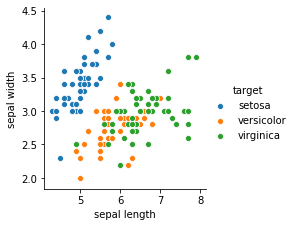

In [20]:
# sepal width, sepal length 확인
sn.pairplot(iris_frame,x_vars=["sepal length"],y_vars=["sepal width"],hue="target",size=3)

C:\Users\user\anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


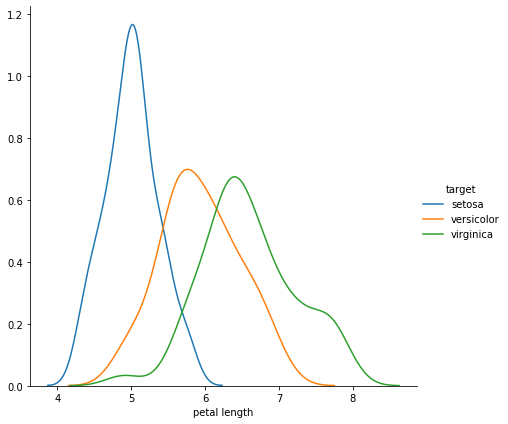

In [21]:
# petal length 확인
sn.FacetGrid(iris_frame,hue="target",size=6).map(sn.kdeplot,"petal length").add_legend()
# petal length 변수에 대한 데이터들의 분포와 밀집도를 확인하는 과정.
# 세 데이터가 확연히 구분되어지는 형태를 띔.

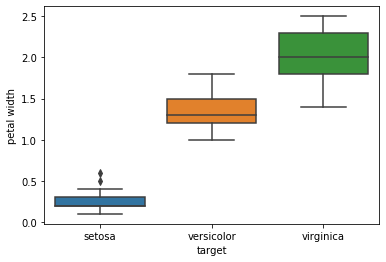

In [22]:
# petal width 구분
sn.boxplot(x="target",y="petal width",data=iris_frame)

# 나이브 베이즈 이론(단순 베이즈 분류) 

### 하나의 데이터가 각각의 클래스에 속하게 될 사후 확률을 계산하고, 해당 데이터는 사후확률이 가장 큰 클래스에 속하게 된다.
### 이상값에 강건하고, 결측값을 조건부 확률 계산기 배제하여 자연스럽게 처리 가능


In [31]:
# feature 중 sepal에 관련된 두 개의 feature만 이용해서 학습
import matplotlib.colors as colors
from sklearn.naive_bayes import GaussianNB 
import matplotlib.pyplot as plt
df1=iris_frame[["sepal length","sepal width","target"]]
x=df1.iloc[:,0:2]
# 실제 df1의 y는 변형되지 않음.
y=df1.iloc[:,2].replace({"setosa":0,"versicolor":1,"virginica":2}).copy()
NB=GaussianNB()
NB.fit(x,y)
N=100

Text(0.5, 1, 'Gaussian Naive Bayes boundaries')

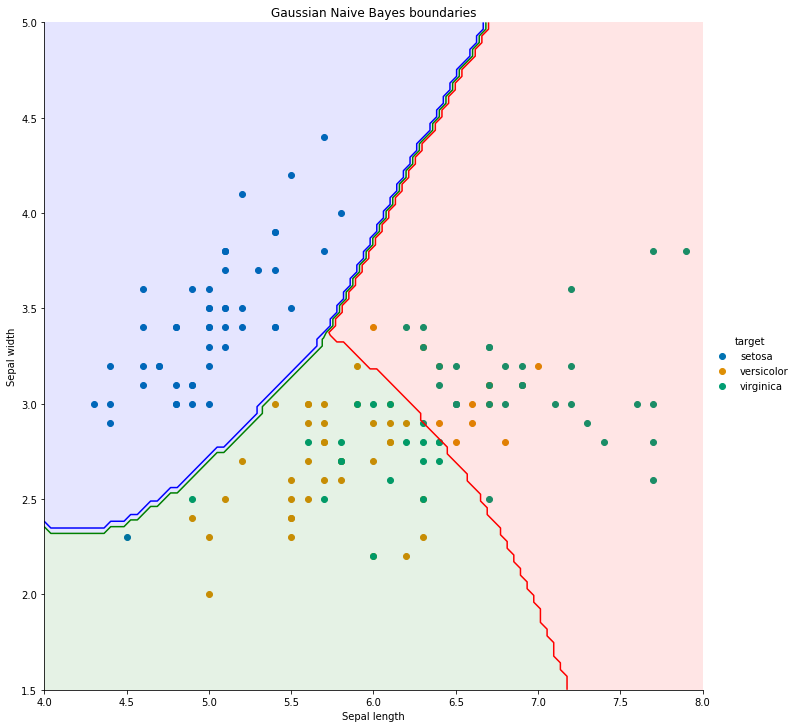

In [33]:
# 격자 안의 모든 점을 예측하고 해당 예측을 통해서 decision boundary visualization
# 4에서 8사이에서 n개의 데이터를 같은 간격으로 배치
x_= np.linspace(4,8,N)
y_= np.linspace(1.5,5,N)
# meshgrid의 목적은 x배열과 y배열로 직사각형 격자를 만드는 것.
x_,y_= np.meshgrid(x_,y_)



color_list= ['Blues','Greens','Reds']
my_norm = colors.Normalize(vmin=-1,vmax=1)
g= sn.FacetGrid(iris_frame, hue = "target", size =10, 
                palette = 'colorblind').map(plt.scatter, "sepal length","sepal width",).add_legend()

my_ax = g.ax
# naive 베이즈 이론 예측값의 첫번째 요소에
zz = np.array( [NB.predict ([[xx,yy]]) [0] for xx,yy in zip(np.ravel(x_),np.ravel(y_))])
# 
z=zz.reshape(x_.shape)

my_ax.contourf(x_,y_,z,2,alpha=.1, colors = ('blue','green','red'))
my_ax.contour(x_,y_,z,2,alpha=1, colors = ('blue','green','red'))

my_ax.set_xlabel('Sepal length')
my_ax.set_ylabel('Sepal width')
my_ax.set_title('Gaussian Naive Bayes boundaries')


